# Load the Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import roc_auc_score,f1_score,recall_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
dataset = pd.read_csv('Datasets/Million_final.csv').drop('Unnamed: 0',axis=1)
features = pd.read_csv('Datasets/Feature_List.csv').drop('Unnamed: 0',axis=1)
labels = dataset['song_hotttnesss']

### Libraries to append scores

In [3]:
scores = []
f1 = []

### Splitting labels and features

In [4]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size = 0.15)

### Handling Data imbalance using Smote

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
features_train, labels_train = sm.fit_sample(features_train, labels_train.ravel())

Using TensorFlow backend.


### Score Calculation

In [6]:
def calculate(labels_pred):
    accuracy = accuracy_score(labels_test,labels_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    scores.append(accuracy * 100.0)
    f1_sc = f1_score(labels_test, labels_pred, average='weighted')
    print("F1 Score: {:.2f}".format(f1_sc*100))
    f1.append(f1_sc)    

### XGB approach

In [7]:
xgb_clf = XGBClassifier()
xgb_clf.fit(features_train,labels_train)
labels_pred = xgb_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 79.47%
F1 Score: 78.92


### LDA approach

In [8]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit_transform(features, labels)
labels_pred = lda_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 84.07%
F1 Score: 80.22


### DecisionTree approach

In [9]:
dt_clf = DecisionTreeClassifier()  
dt_clf.fit(features_train, labels_train)
labels_pred = dt_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 70.07%
F1 Score: 72.12


### RandomForest approach

In [10]:
rf_clf = RandomForestClassifier(n_estimators=158, random_state=0)  
rf_clf.fit(features_train, labels_train)  
labels_pred = rf_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 78.87%
F1 Score: 79.24


### SVM approach

In [11]:
svc_clf = SVC(kernel = 'rbf', random_state = 7)
svc_clf.fit(features_train, labels_train)
labels_pred = svc_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 74.73%
F1 Score: 76.88


### LogisticRegression

In [12]:
lr_clf = LogisticRegression()
lr_clf.fit(features_train, labels_train)
labels_pred = lr_clf.predict(features_test)
calculate(labels_pred)

Accuracy: 72.80%
F1 Score: 75.58


### Ensemble 

In [13]:
clf_vote = VotingClassifier(estimators = [('XGBoost',xgb_clf),('LDA',lda_clf),('Random Forest',rf_clf)])
clf_vote.fit(features_train,labels_train)
labels_train = np.array(labels_train).reshape(len(labels_train))
pred_vote = clf_vote.predict(features_test)
calculate(labels_pred)

Accuracy: 72.80%
F1 Score: 75.58


### Plotting the scores

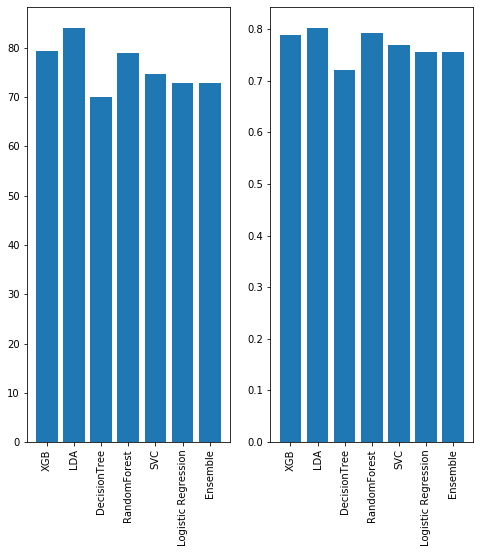

In [14]:
plt.figure(figsize=(8,8))

#1. Accuracy 
plt.subplot(1,2,1)
approach = ['XGB','LDA','DecisionTree','RandomForest','SVC','Logistic Regression','Ensemble']
plt.bar(approach,scores)
plt.xticks(rotation=90)

#2. F1 - scores
plt.subplot(1,2,2)
plt.bar(approach,f1)
plt.xticks(rotation=90);

### Classification Report

In [15]:
report = classification_report(labels_test,pred_vote)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1240
         1.0       0.41      0.47      0.44       260

    accuracy                           0.79      1500
   macro avg       0.65      0.66      0.65      1500
weighted avg       0.80      0.79      0.79      1500



### F-1 Score using cross-validation

In [16]:
score = cross_val_score(clf_vote,features_test,labels_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
f1_score(labels_test, labels_pred, average='weighted')

Accuracy: 0.84 (+/- 0.03)


0.7558044444444445

### Creating Pickle file

In [17]:
import pickle
with open('model','wb') as f:
    pickle.dump(xgb_clf,f)